In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
THIS RESUKLT should report

In [ ]:
!pip install datasets
!pip install peft
!pip install -U bitsandbytes


In [ ]:
import pandas as pd
#https://github.com/diptamath/covid_fake_news/tree/main/data
df=pd.read_csv('/content/drive/MyDrive/Fake_News/english_test_with_labels.csv')
# df = df.sample(n=1000, random_state=42)
df.head()

,id,tweet,label
0,1,Our daily update is published. States reported...,real
1,2,Alfalfa is the only cure for COVID-19.,fake
2,3,President Trump Asked What He Would Do If He W...,fake
3,4,States reported 630 deaths. We are still seein...,real
4,5,This is the sixth time a global health emergen...,real


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


In [ ]:
df['label'].value_counts()

,count
label,
real,1120
fake,1020


In [ ]:
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
import nltk
import re
import string
import pandas as pd
import numpy as np
from wordcloud import WordCloud
string.punctuation

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt_tab')
# Initialize stop words, English words corpus, and stemmer
stop_words = set(stopwords.words('english'))
english_words = set(words.words())
# stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()

    text = re.sub(r"^rt\s+", "", text)

    text = re.sub(r"@\w+", "", text)

    text = re.sub(r"#(\w+)", r"\1", text)

    text = re.sub(r"http\S+|www\S+", "", text)

    text = text.translate(str.maketrans("", "", string.punctuation))

    text = ''.join([i for i in text if not i.isdigit()])

    tokens = word_tokenize(text)


    return ' '.join(tokens)

df['Cleantext'] = df['tweet'].apply(preprocess)


In [ ]:
df['Cleantext'].iloc[4]

'this is the sixth time a global health emergency has been declared under the international health regulations but it is easily the most severe'

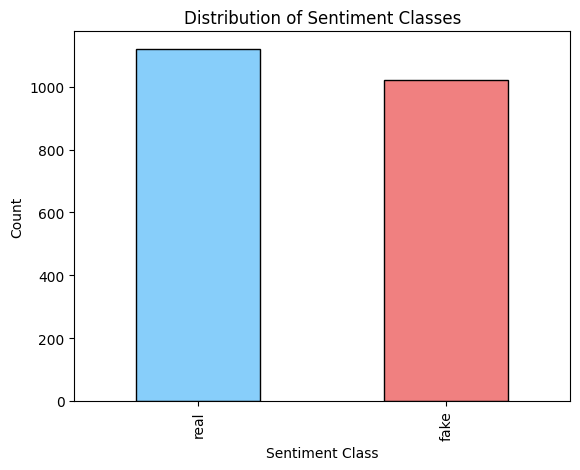

In [ ]:
import matplotlib.pyplot as plt

# Count sentiment classes
sentiment_counts = df["label"].value_counts()

# Define colors for "blue light," "red light," and "green light"
colors = ["lightskyblue", "lightcoral"]  # Light blue, light red, light green

# Plot
sentiment_counts.plot(kind="bar", color=colors, edgecolor="black")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Classes")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import torch
import os
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
import seaborn as sns
import matplotlib as plt
from transformers import AutoModel, BertTokenizerFast
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [ ]:
X=df.Cleantext
Y=df.label
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Further split temp into test and validation
print(f'(X_train: {len(X_train)}\nx_test: {len(X_test)})')

(X_train: 1498
x_test: 642)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(y_train)

# Transform both training and test labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
import numpy as np
import pandas as pd
import torch
import os
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
import seaborn as sns
import matplotlib as plt
from transformers import AutoModel, BertTokenizerFast
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [ ]:
!huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineGrained).
The token `l` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when p

In [ ]:
from transformers import AutoTokenizer

model_name = "meta-llama/Llama-3.1-8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name, add_prefix_space=True)

tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.pad_token = tokenizer.eos_token

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
model.config.pad_token_id = tokenizer.pad_token_id
model.config.use_cache = False
model.config.pretraining_tp = 1

In [ ]:
!pip install datasets

In [ ]:
import torch
from transformers import AutoModel

from transformers import BitsAndBytesConfig

device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "meta-llama/Llama-3.1-8B-Instruct"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16
)

model = AutoModel.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    quantization_config=bnb_config,

)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
model.eval()

LlamaModel(
  (embed_tokens): Embedding(128256, 4096)
  (layers): ModuleList(
    (0-31): 32 x LlamaDecoderLayer(
      (self_attn): LlamaAttention(
        (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
        (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
        (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
        (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
      )
      (mlp): LlamaMLP(
        (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
        (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
        (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
        (act_fn): SiLU()
      )
      (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
      (post_attention_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
    )
  )
  (norm): LlamaRMSNorm((4096,), eps=1e-05)
  (rotary_emb): LlamaRotaryEmbedding()
)

In [ ]:
def get_embeddings(texts):
    all_embeddings = []

    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
            last_hidden_state = outputs.last_hidden_state  # (batch_size, seq_len, hidden_size)
            attention_mask = inputs['attention_mask'].unsqueeze(-1).expand(last_hidden_state.size()).float()
            masked_embeddings = last_hidden_state * attention_mask
            summed = masked_embeddings.sum(1)
            counts = attention_mask.sum(1)
            embedding = (summed / counts).squeeze().cpu().numpy()
        all_embeddings.append(embedding)

    return all_embeddings


In [ ]:
import time

In [ ]:
start_time = time.time()
X_train = get_embeddings(X_train)
X_test = get_embeddings(X_test)
end_time = time.time()
print(f"Embedding  took {end_time - start_time:.2f} seconds.")

Embedding  took 599.62 seconds.


In [ ]:
X_test

[array([ 0.66254896, -2.0278895 , -0.21423969, ..., -0.7505206 ,
        -0.9991437 ,  0.069905  ], dtype=float32),
 array([-0.14759701, -0.75163734,  1.0231323 , ...,  0.12231071,
        -0.8292087 ,  0.74671155], dtype=float32),
 array([-0.61296976, -1.6391401 , -0.58921236, ..., -0.4202465 ,
        -0.07459049, -0.6913852 ], dtype=float32),
 array([-0.44456756, -1.5585499 , -0.37654623, ..., -0.24875191,
        -0.71884704,  0.5790077 ], dtype=float32),
 array([ 0.92387015, -2.4586442 , -0.26018798, ...,  0.22793248,
         0.67442465, -1.1148665 ], dtype=float32),
 array([-0.90113324, -0.7372416 ,  1.9133464 , ..., -0.5529378 ,
        -0.3458496 ,  0.9097697 ], dtype=float32),
 array([-1.0757077 ,  0.1955478 ,  0.9758341 , ..., -0.38477364,
        -0.00416364,  0.48199743], dtype=float32),
 array([ 0.2752243 , -0.99127614, -1.0990926 , ..., -0.7111206 ,
        -0.7174815 , -0.6556981 ], dtype=float32),
 array([-0.06307581, -0.6841151 ,  0.29975381, ..., -0.7086453 ,
       

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Pca

In [ ]:
from sklearn.decomposition import PCA

n_components = 50  # Adjust as needed for your data

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=0.6)
svc.fit(X_train_pca, y_train_encoded)


SVC(C=0.6)

In [ ]:
from sklearn.metrics import classification_report

y_pred_pca = svc.predict(X_test_pca)

# Decode the predictions to match the string labels
y_pred_decoded = label_encoder.inverse_transform(y_pred_pca)

# Print the classification report with decoded predictions
print(classification_report(y_test, y_pred_decoded, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

        fake       0.90      0.94      0.92       296
        real       0.94      0.91      0.92       346

    accuracy                           0.92       642
   macro avg       0.92      0.92      0.92       642
weighted avg       0.92      0.92      0.92       642



In [ ]:
y_pred_pca = svc.predict(X_train_pca)

# Decode the predictions to match the string labels
y_pred_decoded = label_encoder.inverse_transform(y_pred_pca)

# Print the classification report with decoded predictions
print(classification_report(y_train, y_pred_decoded, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        fake       0.95      0.94      0.95       724
        real       0.95      0.95      0.95       774

    accuracy                           0.95      1498
   macro avg       0.95      0.95      0.95      1498
weighted avg       0.95      0.95      0.95      1498



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfp = RandomForestClassifier(n_estimators=100, random_state=42)
rfp.fit(X_train_pca, y_train_encoded)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred_pcar = rfp.predict(X_test_pca)

# Decode the predictions to match the string labels
y_pred_decodedr = label_encoder.inverse_transform(y_pred_pcar)

# Print the classification report with decoded predictions
print(classification_report(y_test, y_pred_decodedr, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

        fake       0.87      0.91      0.89       296
        real       0.92      0.88      0.90       346

    accuracy                           0.90       642
   macro avg       0.90      0.90      0.90       642
weighted avg       0.90      0.90      0.90       642



In [ ]:
y_pred_pcarr = svc.predict(X_train_pca)

# Decode the predictions to match the string labels
y_pred_decodedrr = label_encoder.inverse_transform(y_pred_pcarr)

# Print the classification report with decoded predictions
print(classification_report(y_train, y_pred_decodedrr, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        fake       0.95      0.94      0.95       724
        real       0.95      0.95      0.95       774

    accuracy                           0.95      1498
   macro avg       0.95      0.95      0.95      1498
weighted avg       0.95      0.95      0.95      1498



# Normal

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=0.6)
svc.fit(X_train_scaled, y_train)


SVC(C=0.6)

In [ ]:
from sklearn.metrics import classification_report

y_pred = svc.predict(X_test_scaled)

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

        fake       0.91      0.94      0.92       296
        real       0.94      0.92      0.93       346

    accuracy                           0.93       642
   macro avg       0.92      0.93      0.92       642
weighted avg       0.93      0.93      0.93       642



In [ ]:
from sklearn.metrics import classification_report

train_preds_S = svc.predict(X_train_scaled)

print(classification_report(y_train, train_preds_S))


              precision    recall  f1-score   support

        fake       0.97      0.98      0.97       724
        real       0.98      0.97      0.98       774

    accuracy                           0.97      1498
   macro avg       0.97      0.97      0.97      1498
weighted avg       0.97      0.97      0.97      1498



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        fake       0.86      0.91      0.89       296
        real       0.92      0.87      0.90       346

    accuracy                           0.89       642
   macro avg       0.89      0.89      0.89       642
weighted avg       0.89      0.89      0.89       642



In [ ]:
from sklearn.metrics import classification_report

train_preds_S = rf.predict(X_train_scaled)

print(classification_report(y_train, train_preds_S))


              precision    recall  f1-score   support

        fake       0.86      0.93      0.90       724
        real       0.93      0.86      0.90       774

    accuracy                           0.90      1498
   macro avg       0.90      0.90      0.90      1498
weighted avg       0.90      0.90      0.90      1498



In [ ]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

svc = SVC(C=1, probability=True)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
rf = RandomForestClassifier()

voting = VotingClassifier(estimators=[
    ('svc', svc),
    ('xgb', xgb),
    ('rf', rf)
], voting='soft')  # Use 'soft' to average probabilities

voting.fit(X_train_scaled, y_train_encoded)



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:27:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('svc', SVC(C=1, probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            i...constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test_scaled)

print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       296
           1       0.94      0.90      0.92       346

    accuracy                           0.92       642
   macro avg       0.92      0.92      0.92       642
weighted avg       0.92      0.92      0.92       642



In [ ]:
from sklearn.metrics import classification_report

train_preds_S = voting.predict(X_train_scaled)

print(classification_report(y_train_encoded, train_preds_Sوtarget_names=label_encoder.classes_))


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig

device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "meta-llama/Llama-3.1-8B-Instruct"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16
)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    quantization_config=bnb_config,

)
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.1-8B-Instruct")
tokenizer.pad_token_id = tokenizer.eos_token_id  # Set the pad token to the EOS token if it’s not defined

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Define prompt generation for binary fake news detection
def generate_prompt(data_point):
    return f"""Classify the following Covid19-related news text as either Real or Fake.
Cleantext: {data_point["Cleantext"]}
label: {data_point["label"]}"""

def generate_test_prompt(data_point):
    return f"""Classify the following Covid19-related news text as either Real or Fake.
Cleantext: {data_point["Cleantext"]}
label: """

def convert_to_chat_format(example):
    return {
        "messages": [
            {"role": "user", "content": f"Classify the following Covid19-related news text as either Real or Fake.\ntext: {example['Cleantext']}"},
            {"role": "assistant", "content": example["label"]}
        ]
    }

# Optional: map short labels if needed
label_mapping = {
    'real': 'Real',
    'fake': 'Fake'
}

# Map labels to standard format (if needed)
y_test = y_test.map(label_mapping)

# Create test DataFrame
df_test = pd.DataFrame({'Cleantext': X_test, 'label': y_test})

# Generate test prompts and true labels
y_true = df_test['label']
X_test = pd.DataFrame(df_test.apply(generate_test_prompt, axis=1), columns=["Cleantext"])


In [ ]:
y_true

,label
1532,Real
1726,Real
1414,Real
2064,Real
930,Real
...,...
526,Real
759,Fake
812,Fake
182,Real


In [ ]:
from tqdm import tqdm
from transformers import pipeline  # Import pipeline from transformers

def predict(test, model, tokenizer):
    y_pred = []
    categories = ["Real", "Fake"]  # Update for binary classification

    # Define the generation pipeline once (not inside the loop!)
    pipe = pipeline(
        task="text-generation",
        model=model,
        tokenizer=tokenizer,
        max_new_tokens=5,         # enough to return "Real" or "Fake"
        temperature=0.1,
        return_full_text=False    # only return generated part
    )

    for i in tqdm(range(len(test))):
        prompt = test.iloc[i]["Cleantext"]

        result = pipe(prompt)
        answer = result[0]['generated_text'].strip()

        matched = False
        for category in categories:
            if category.lower() in answer.lower():
                y_pred.append(category)
                matched = True
                break

        if not matched:
            y_pred.append("none")  # fallback if no match found

    return y_pred

y_pred = predict(X_test, model, tokenizer)

Device set to use cuda:0
100%|██████████| 642/642 [05:03<00:00,  2.11it/s]


In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np

def evaluate(y_true, y_pred):
    labels = ["Fake", "Real"]  # Binary labels
    mapping = {label: idx for idx, label in enumerate(labels)}

    def map_func(x):
        return mapping.get(x, -1)  # fallback if label is unknown

    y_true_mapped = np.vectorize(map_func)(y_true)
    y_pred_mapped = np.vectorize(map_func)(y_pred)

    # Calculate overall accuracy
    accuracy = accuracy_score(y_true=y_true_mapped, y_pred=y_pred_mapped)
    print(f'✅ Overall Accuracy: {accuracy:.3f}\n')

    # Per-class accuracy
    unique_labels = set(y_true_mapped)
    for label in unique_labels:
        label_indices = [i for i in range(len(y_true_mapped)) if y_true_mapped[i] == label]
        label_y_true = [y_true_mapped[i] for i in label_indices]
        label_y_pred = [y_pred_mapped[i] for i in label_indices]
        label_accuracy = accuracy_score(label_y_true, label_y_pred)
        print(f'🔹 Accuracy for label {labels[label]}: {label_accuracy:.3f}')

    # Classification report
    class_report = classification_report(
        y_true=y_true_mapped,
        y_pred=y_pred_mapped,
        target_names=labels,
        labels=list(range(len(labels)))
    )
    print('\n📋 Classification Report:')
    print(class_report)

    # Confusion matrix
    conf_matrix = confusion_matrix(
        y_true=y_true_mapped,
        y_pred=y_pred_mapped,
        labels=list(range(len(labels)))
    )
    print('\n🧩 Confusion Matrix:')
    print(conf_matrix)


evaluate(y_true, y_pred)

✅ Overall Accuracy: 0.435

🔹 Accuracy for label Fake: 0.047
🔹 Accuracy for label Real: 0.766

📋 Classification Report:
              precision    recall  f1-score   support

        Fake       0.88      0.05      0.09       296
        Real       0.54      0.77      0.63       346

   micro avg       0.55      0.43      0.49       642
   macro avg       0.71      0.41      0.36       642
weighted avg       0.69      0.43      0.38       642


🧩 Confusion Matrix:
[[ 14 227]
 [  2 265]]
